# Thyroid Cancer Risk Estimation

## Problem Definition
Thyroid cancer is one of the most common cancers affecting the endocrine system, and early detection plays a critical role in improving patient outcomes. The goal of this project is to predict the risk of thyroid cancer in individuals based on various demographic, lifestyle, and medical factors. By analyzing the dataset, we aim to identify key factors that contribute to the development of thyroid cancer and to build a model that can estimate the risk level of thyroid cancer in new patients.

The specific problem we are addressing is:

### Problem Statement:
Given a set of medical and demographic features, how can we predict whether a person is at risk of developing thyroid cancer and quantify their risk level (e.g., high, medium, or low)?

The dataset provided contains various factors such as age, gender, medical history, and thyroid-related lab results that may be used to estimate the likelihood of developing thyroid cancer.

## Proposed Solution Methods
Since Thyroid Cancer Risk Estimation problem is a Supervised Learning → Classification problem, then we proposed the following two models:
#### 1. Logistic Regression
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. 

#### 2. Random Forest
A Random Forest Algorithm is a supervised machine learning algorithm that is extremely popular and is used for Classification and Regression problems in Machine Learning.

## Dataset Explanation
The dataset consists of 212,691 entries, with 17 columns, which can be divided into demographic, medical, and thyroid-specific factors. Here’s a breakdown of the dataset columns:

**Patient_ID:** Unique identifier for each patient (integer).

**Age:** Age of the patient (integer).

**Gender:** Gender of the patient (categorical: male/female).

**Country:** Country of residence (categorical).

**Ethnicity:** Ethnic background of the patient (categorical).

**Family_History:** Whether the patient has a family history of thyroid cancer (categorical: yes/no).

**Radiation_Exposure:** Whether the patient has been exposed to radiation (categorical: yes/no).

**Iodine_Deficiency:** Indicates iodine deficiency (categorical: yes/no).

**Smoking:** Smoking history of the patient (categorical: yes/no).

**Obesity:** Whether the patient is obese (categorical: yes/no).

**Diabetes:** Whether the patient has diabetes (categorical: yes/no).

**TSH_Level:** Level of thyroid-stimulating hormone in the blood (continuous).

**T3_Level:** Level of Triiodothyronine hormone (continuous).

**T4_Level:** Level of Thyroxine hormone (continuous).

**Nodule_Size:** Size of the thyroid nodule (continuous).

**Thyroid_Cancer_Risk:** Risk level of developing thyroid cancer (categorical: low/medium/high).

**Diagnosis:** Diagnosis outcome (categorical: benign/malignant).

**Data Characteristics:**

**Categorical Variables:** Gender, Country, Ethnicity, Family_History, Radiation_Exposure, Iodine_Deficiency, Smoking, Obesity, Diabetes, Thyroid_Cancer_Risk, and Diagnosis.

**Continuous Variables:** Age, TSH_Level, T3_Level, T4_Level, and Nodule_Size.

**Target Variable:** Thyroid_Cancer_Risk, which indicates the risk level (low, medium, or high) of thyroid cancer. This is the primary output variable that we aim to predict.


#### Installinig libraries

##### The following libraries are required to be installed for running this project
pip install pandas  
pip install seaborn  
pip install scikit-learn  
pip install mord  

#### Importing libraries

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mord import LogisticAT
from sklearn.metrics import classification_report, confusion_matrix

### To render plots inside the notebook

In [200]:
%matplotlib inline

#### Loading data set

In [201]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

#### Displaying 5 first records for better understanding of the dataset.

In [202]:
df.head(5)

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


## Data Preprocessing:
**1. Duplicate Records:** The dataset does not have any duplicate records, but because the aim of this project is to learn how to do data analysis that's why I am checking for the duplicate records and deleting if there are any.

**2. Missing Values:** The dataset have no missing values, but still looking for missing values and handling them using Median, Mean, Mode, or even removing the record.
   
**3. Wrong Data:** Handling wrong data by replacing with correct data or removing records which have wrong data.

**4. Features Importance Analysis:** Finding the less important feature and dropping them in order to improve model performance and efficiency.

**5. Encoding Categorical** Features: Features such as Gender, Family_History, Radiation_Exposure, etc., will be converted into numerical representations.

**6. Scaling Features:** Continuous features like TSH_Level, T3_Level, etc., will need to be scaled for some models to perform optimally.

### 1. Duplicate Records
check for duplicated records if there are any then remove them

In [203]:
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("There are no duplicate records in the dataset.")
else:
    df.drop_duplicates(inplace=True)
    count = len(duplicates)
    if count == 1:
        print("One duplicate record was removed from the dataset.")
    else:
        print(f"{count} duplicate records were removed from the dataset.")

There are no duplicate records in the dataset.


### 2. Missing Values

#### a. Replace Missing Values
    
##### Median: Replace missing Age values with median if there are any missing values for Age.


In [204]:
medianAge = round(df["Age"].median())

df.fillna({"Age": medianAge}, inplace=True)
print(f"Median for Age attribute is: {medianAge}")

missing_count = df["Age"].isna().sum()
print(f"{missing_count} missing 'Age' values were filled with the median.")

Median for Age attribute is: 52
0 missing 'Age' values were filled with the median.


##### Mean: If there are any empty cells for Nodule_Size attribute, then replace it with the mean.

In [205]:
meanSize = round(df["Nodule_Size"].mean(), 2)

df.fillna({"Nodule_Size": meanSize}, inplace=True)
print(f"Mean for Nodule_Size attribute is: {meanSize}")

missing_count = df["Nodule_Size"].isna().sum()
print(f"{missing_count} missing 'Nodule_Size' values were filled with the mean.")

Mean for Nodule_Size attribute is: 2.5
0 missing 'Nodule_Size' values were filled with the mean.


##### Mode: Calculate the MODE for Country, and replace any empty values of the Country column with it

In [206]:
modeForCountry = df["Country"].mode()[0]

df.fillna({"Country": modeForCountry}, inplace=True)
print(f"Mode for Country attribute is: {modeForCountry}")

missing_count = df["Country"].isna().sum()
print(f"{missing_count} missing 'Country' values were filled with the mode.")

Mode for Country attribute is: India
0 missing 'Country' values were filled with the mode.


#### b. Delete entire record if any Diagnosis values are missing

In [207]:
df.dropna(subset=['Diagnosis'], inplace = True)

missing_count = df["Diagnosis"].isna().sum()
print(f"{missing_count} records removed because of missing 'Diagnosis' values.")

0 records removed because of missing 'Diagnosis' values.


### 3. Wrong Data
 #### a. Replace with correct data

In [208]:
for x in df.index:
  if df.loc[x, "Age"] > 100:
    df.loc[x, "Age"] = 100

#### b. Remove record which has wrong data

In [209]:
for x in df.index:
  if df.loc[x, "Nodule_Size"] > 20:
    df.drop(x, inplace = True)

## 4. Features Importance Analysis

##### Using Random Forest Feature Importance

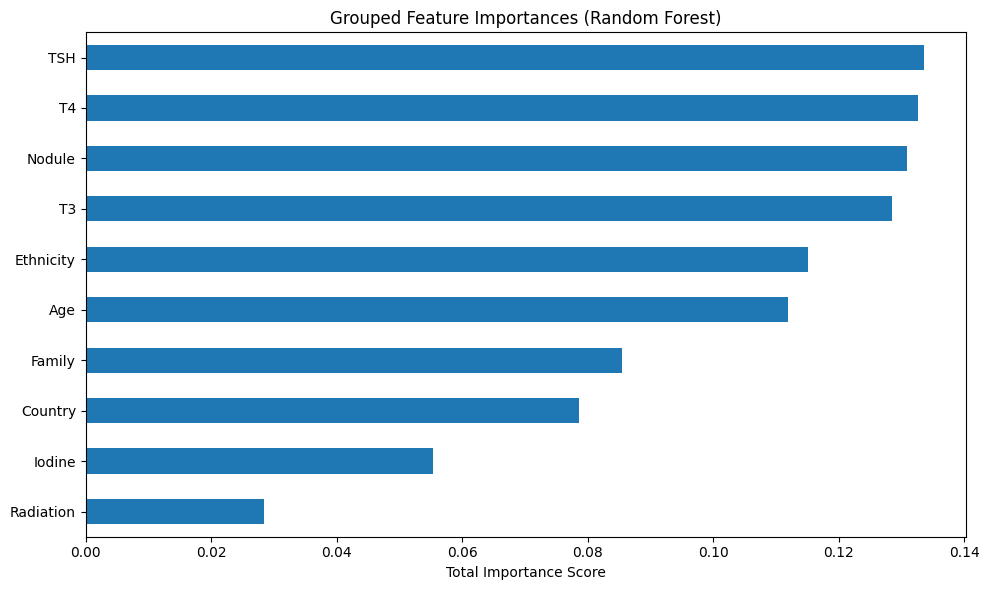

In [210]:
# Re-train Random Forest if needed
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)

# Feature importances
feature_names = X.columns
importances = pd.Series(rf.feature_importances_, index=feature_names)

# Group by prefix (e.g., 'Country_', 'Gender_', etc.)
grouped_importances = importances.groupby(lambda x: x.split('_')[0]).sum()

# Sort and plot
grouped_importances = grouped_importances.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
grouped_importances.tail(15).plot(kind='barh')
plt.title("Grouped Feature Importances (Random Forest)")
plt.xlabel("Total Importance Score")
plt.tight_layout()
plt.show()

#### Deleting less important features

In [211]:
# Deleting Patient_ID column, because it is not needed, has no affect in the modeling
df = df.drop('Patient_ID', axis=1)
# Drop diagnosis (often overlaps with target or comes after diagnosis). Using a confirmed diagnosis to predict risk (which should be predicted earlier) would be logically and clinically invalid.
df = df.drop('Diagnosis', axis=1)
#Deleting less important features for improving the performance and effeciency of the model
df = df.drop('Smoking', axis=1)
df = df.drop('Diabetes', axis=1)
df = df.drop('Obesity', axis=1)
df = df.drop('Gender', axis=1)

### 5. Encoding Categorical Features

In [212]:
# Dividing our dataset to target feature and input features
y = df['Thyroid_Cancer_Risk']
X = df.drop(['Thyroid_Cancer_Risk'], axis=1)

# Changing Low, Medium, and High to 0, 1, and 2
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
y = y.map(risk_mapping)

# One-hot encode categorical variables, Nominal (unordered)
X = pd.get_dummies(X, drop_first=True)

### 6. Scaling Features

In [213]:
# Scaling our features (transforming our data so that the values of each feature (column) have a similar range or distribution)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Training Set & Test Set

In [214]:
# Splitting the dataset into train and test datasets, percentage of 80% + 20% and shuffling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=23)

## 1. Logistic Regression Model

In [215]:
# Train Ordinal Logistic Regression
model = LogisticAT(alpha=1.0)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report for Logistic Regression Model:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

Classification Report:
              precision    recall  f1-score   support

         Low       0.60      0.69      0.64     21770
      Medium       0.27      0.30      0.29     14457
        High       1.00      0.19      0.32      6312

    accuracy                           0.49     42539
   macro avg       0.62      0.39      0.41     42539
weighted avg       0.55      0.49      0.47     42539



### Confusion Matrix for Logistic Regression Model

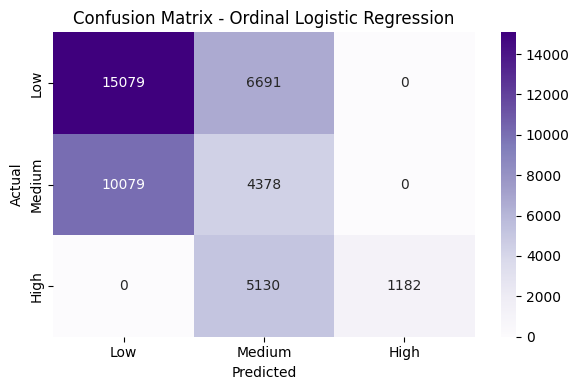

In [216]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Ordinal Logistic Regression')
plt.tight_layout()
plt.show()

## 2. Random Forest Model

In [217]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Classification report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_rf, target_names=['Low', 'Medium', 'High']))

Classification Report:
              precision    recall  f1-score   support

         Low       0.60      0.85      0.70     21770
      Medium       0.39      0.15      0.22     14457
        High       1.00      1.00      1.00      6312

    accuracy                           0.63     42539
   macro avg       0.66      0.67      0.64     42539
weighted avg       0.59      0.63      0.58     42539



### Confusion Matrix for Random Forest Model

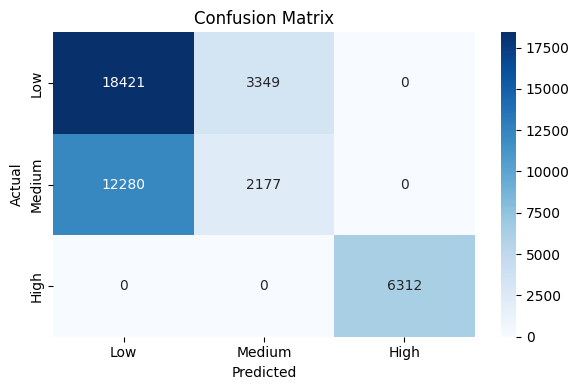

In [218]:
# Creating Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
# Plotting it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Model")
plt.tight_layout()
plt.show()